<a href="https://colab.research.google.com/github/nitinpatil301a/Deep-learning-youtube/blob/master/breast_cancer_classification_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.0.0
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.0.0`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

In [3]:
X=pd.DataFrame(cancer.data,columns=cancer.feature_names)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
y=pd.DataFrame(cancer.target,columns=['target'])
y['target'].unique()

array([0, 1])

In [0]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X=pd.DataFrame(sc.fit_transform(X),columns=X.columns)



In [6]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,stratify=y)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((455, 30), (455, 1), (114, 30), (114, 1))

In [0]:
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras import Sequential

In [0]:
model=Sequential()
model.add(Dense(50,activation='relu',input_shape=X_train.shape))
model.add(Dropout(0.5))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))





In [0]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 455, 50)           1550      
_________________________________________________________________
dropout (Dropout)            (None, 455, 50)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 455, 50)           2550      
_________________________________________________________________
dropout_1 (Dropout)          (None, 455, 50)           0         
_________________________________________________________________
dense_2 (Dense)              (None, 455, 50)           2550      
_________________________________________________________________
dropout_2 (Dropout)          (None, 455, 50)           0         
_________________________________________________________________
dense_3 (Dense)              (None, 455, 1)            5

In [12]:
history=model.fit(X_train,y_train,batch_size=10,epochs=50,validation_split=0.1)

Epoch 1/50
41/41 [==============================] - 0s 7ms/step - loss: 0.6724 - accuracy: 0.6235 - val_loss: 0.4379 - val_accuracy: 0.8696
Epoch 2/50
41/41 [==============================] - 0s 2ms/step - loss: 0.4723 - accuracy: 0.7971 - val_loss: 0.2797 - val_accuracy: 0.8913
Epoch 3/50
41/41 [==============================] - 0s 2ms/step - loss: 0.3862 - accuracy: 0.8337 - val_loss: 0.2019 - val_accuracy: 0.9130
Epoch 4/50
41/41 [==============================] - 0s 2ms/step - loss: 0.2570 - accuracy: 0.9291 - val_loss: 0.1624 - val_accuracy: 0.9130
Epoch 5/50
41/41 [==============================] - 0s 2ms/step - loss: 0.2405 - accuracy: 0.9193 - val_loss: 0.1458 - val_accuracy: 0.9348
Epoch 6/50
41/41 [==============================] - 0s 2ms/step - loss: 0.1810 - accuracy: 0.9560 - val_loss: 0.1148 - val_accuracy: 0.9565
Epoch 7/50
41/41 [==============================] - 0s 2ms/step - loss: 0.1623 - accuracy: 0.9487 - val_loss: 0.0886 - val_accuracy: 0.9565
Epoch 8/50
41/41 [==

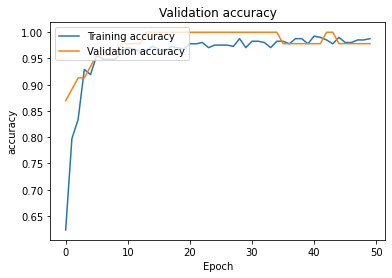

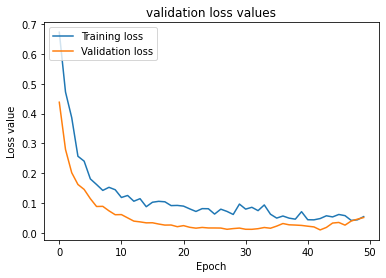

In [13]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

In [14]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.0125 - accuracy: 1.0000


[0.012500778771936893, 1.0]

In [0]:
y_pred=model.predict_classes(X_test.values)

In [26]:
from sklearn.metrics import classification_report
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        42\n           1       1.00      1.00      1.00        72\n\n    accuracy                           1.00       114\n   macro avg       1.00      1.00      1.00       114\nweighted avg       1.00      1.00      1.00       114\n'